# Multi-Variate Linear Regression Methods
**En esta notebook se implementan diferentes métodos de regresión lineal multivariable**

Los algoritmos implementados son:
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent


**Trabajo por:**
- Luis Izquierdo Berdugo
- Jorge Orozco Poot
- Nicolás Sánchez Franco
- Leonardo Zurita Martínez

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Primero se creará el dataframe para utilizar los datos

In [80]:
df = pd.read_csv('insurance.csv')
df.sex.replace(('female', 'male'),(1,2), inplace = True)
df.smoker.replace(('yes', 'no'),(1,2), inplace = True)
df.region.replace(('southwest', 'southeast', 'northwest', 'northeast'),(1,2,3,4), inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


In [81]:
X = df.values[:, 0:6] #Valores de las columnas de datos
Y = df.values[:, 6] #Valor del output deseado

### Se continuará con con la normalización de los datos

In [82]:
def normalization(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0, ddof = 1)
    x_normalizada = (x - mu) / sigma
    return x_normalizada, mu, sigma

In [83]:
X, mu, sigma = normalization(X)

### Se efectúa el cálculo de la pérdida o costo por medio del error cuadrático medio

In [84]:
def calcular_perdida(x, y, theta):
    predict = x.dot(theta)
    error = np.subtract(predict, y)
    J = 1/(2*m_train) * error.T.dot(error)
    return J

# BGD
### Se crea la función para usar el método de Batch Gradient Descent

In [85]:
def gradient_descent(x, y, theta, alpha, iterations):
    hist_perdida = np.zeros(iterations)
    for i in range(iterations):
        pred = x.dot(theta)
        error = np.subtract(pred, y)
        delta = (alpha/m_train) * x.transpose().dot(error)
        theta = theta - delta
        hist_perdida[i] = calcular_perdida(x, y, theta)
    return theta, hist_perdida

### Se importa la librería sklearn para hacer la división de datos de entrenamiento y de prueba

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)
m_train = X_train.shape[0]
m_test = X_test.shape[0]

### Se declaran las iteraciones, el alpha (ratio de aprendizaje) y un arreglo de zeros para iniciar el de theta
#### Se inicia la función

In [88]:
theta = np.zeros(X_train.shape[1])
iterations = 5000
alpha = 0.001

th_n, hist_perdida = gradient_descent(X_train, y_train, theta, alpha, iterations)

### Se grafica el historial de pérdida o costo, este debería disminuir conforme aumentan las iteraciones

Text(0, 0.5, 'Pérdida (J)')

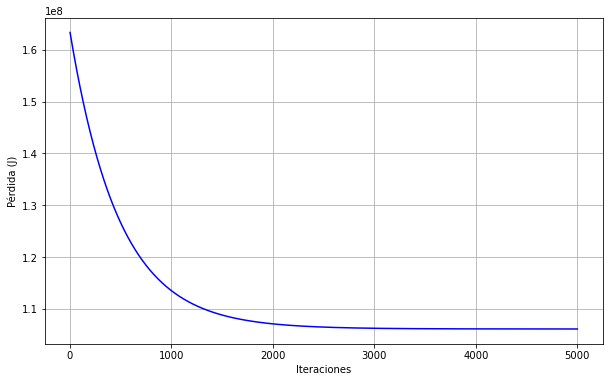

In [89]:
plt.plot(range(1, iterations +1), hist_perdida, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (J)")

### Se grafica la comparación entre los datos reales y la predicción

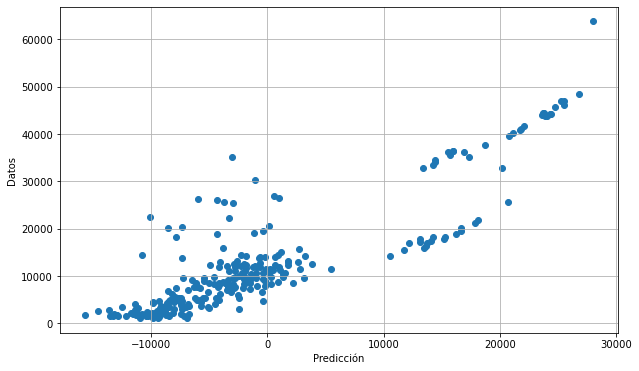

In [90]:
pred = X_test.dot(th_n)
plt.scatter(pred, y_test)
plt.ylabel('Datos')
plt.xlabel('Predicción')
plt.grid(True)
plt.show()

# SGD
### Se crea una función para definir el learning rate.

In [116]:
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)

### Se crea la función para usar el método de Stochastic Gradient Descent

In [117]:
def SGD(X,y,theta,n_epochs=50):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]
            gradients = 2 * ind_x.T.dot(ind_x.dot(theta) - ind_y)
            eta = learning_schedule(epoch * len(y) + i)
            theta = theta - eta * gradients
            c_hist[epoch] = calcular_perdida(ind_x,ind_y,theta)
    return theta,c_hist

### Se declara el arreglo de thetas para iniciar y se ejecuta la función con nuestros datos

In [118]:
thetas = np.zeros(X_train.shape[1])
th_n,cost_history = SGD(X_train,y_train,thetas)

### Se grafica el historial de pérdida o costo, este debería disminuir conforme aumentan las iteraciones

Text(0, 0.5, 'Pérdida (J)')

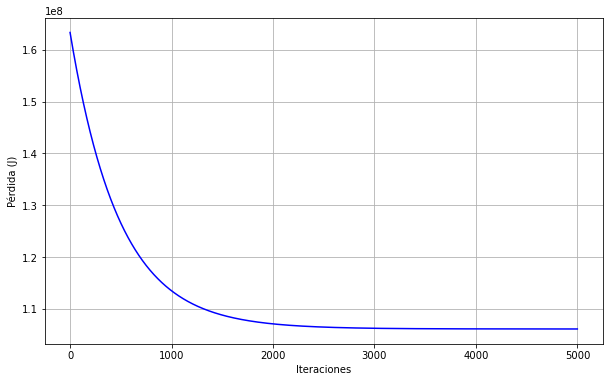

In [119]:
plt.plot(range(5000), hist_perdida, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (J)")

### Se grafica la comparación entre los datos reales y la predicción

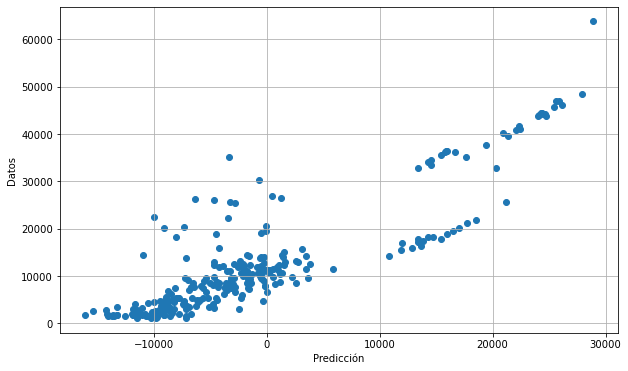

In [121]:
pred = X_test.dot(th_n)
plt.scatter(pred, y_test)
plt.ylabel('Datos')
plt.xlabel('Predicción')
plt.grid(True)
plt.show()

# MBGD
### Se crea la función para el Mini-Batch Gradient Descent

In [123]:
def MBGD(X,y,theta,n_epochs=50, batch_size = 40):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
        for i in range(0,m,batch_size):
            ind_x = X[i:i+batch_size,:]
            ind_y = y[i:i+batch_size]
            gradients = (1/m) * ind_x_.T @ (ind_x @ theta - ind_y)
            eta = learning_schedule(epoch * len(y) + i)
            theta = theta - eta * gradients
            c_hist[epoch] = calcular_perdida(ind_x,ind_y,theta)
    return theta,c_hist

### Se declara el arreglo de thetas para iniciar y se ejecuta la función con nuestros datos

In [125]:
thetas = np.zeros(X_train.shape[1])
th_n,cost_history = SGD(X_train,y_train,thetas)

### Se grafica el historial de pérdida o costo, este debería disminuir conforme aumentan las iteraciones

Text(0, 0.5, 'Pérdida (J)')

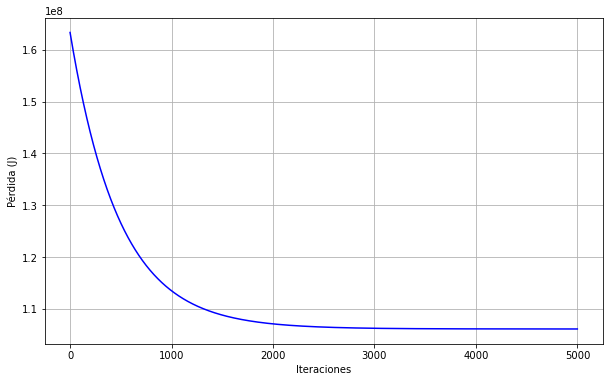

In [126]:
plt.plot(range(5000), hist_perdida, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (J)")

### Se grafica la comparación entre los datos reales y la predicción

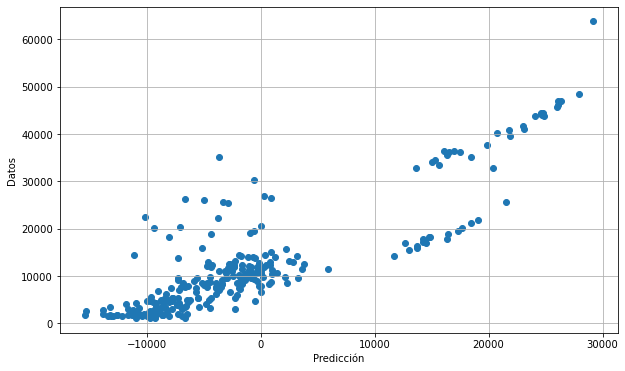

In [127]:
pred = X_test.dot(th_n)
plt.scatter(pred, y_test)
plt.ylabel('Datos')
plt.xlabel('Predicción')
plt.grid(True)
plt.show()